<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [681]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [682]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [683]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [684]:
import os

In [685]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Lab-NLP')

In [686]:
reviews_df = pd.read_csv('reviews.csv')
prod_data = pd.read_csv('product_data.csv')

In [687]:
reviews_df.head(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000


In [688]:
prod_data.head(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0000000,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7000000,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3000000,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1000000,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.9900000,0.0000000


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [689]:
prod_data.drop(['url','title','reviewUrl','image'], axis =1,inplace = True)

In [690]:
prod_data.head(5)

,asin,brand,rating,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,3.0000000,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,3.0000000,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,2.7000000,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,3.3000000,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,3.1000000,12,149.9900000,0.0000000


### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [691]:
reviews_df.describe(include = "all")

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,nan,2983,2,41489,59811,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,981,6507,nan,234,61225,6043,303,nan
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


In [692]:
prod_data.describe(include = 'all')

,asin,brand,rating,totalReviews,price,originalPrice
count,720,716,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,nan,nan,nan,nan
top,B06Y2GX8K8,Samsung,nan,nan,nan,nan
freq,1,346,nan,nan,nan,nan
mean,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


### 4.3 From the above statistical summry, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

In [693]:
# In total of 720 unique products, 
# the top brand is Samsung with title Samsung, Galaxy S10 Factory Unlocked Phone with 128GB - Prism Black 
# with the review range of rating from 1-5 
# and price range from 649.99 to 899.99
prod_data.nunique()

asin             720
brand             10
rating            33
totalReviews     247
price            453
originalPrice     90
dtype: int64

In [694]:
reviews_df.nunique()

asin              720
name            47323
rating              5
date             2983
verified            2
title           41489
body            59811
helpfulVotes      278
dtype: int64

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

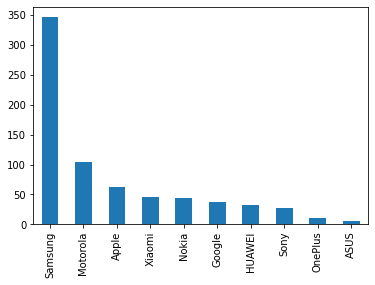

In [695]:
prod_data['brand'].value_counts().plot(kind='bar')
# samsung is the Top brand with more than 50% - 340+ out of 720 products

### 4.5 Display average rating per brand

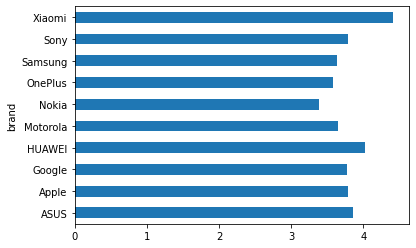

In [696]:
prod_data.groupby('brand').mean()['rating'].plot(kind='barh')
# Xiami brand has the highest average rating of 4.5+ followed by Sony and samsung

### 4.6 Display average price per brand

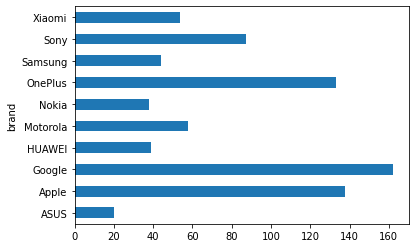

In [697]:
prod_data.groupby('brand').mean()['originalPrice'].plot(kind='barh')
# One plus has the highest pricing unlike Apple

### 4.7 Display average 'totalReviews' per brand

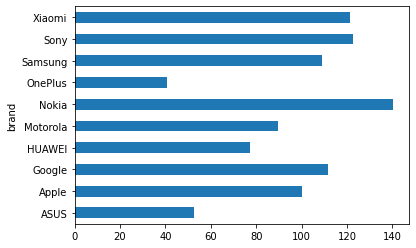

In [698]:
prod_data.groupby('brand').mean()['totalReviews'].plot(kind='barh')

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [699]:
#combined_df = reviews_df.merge(prod_data, on = 'asin')
combined_df = pd.merge(prod_data, reviews_df, on = 'asin', how = 'inner')

In [700]:
combined_df.shape

(67986, 13)

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [701]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67986 entries, 0 to 67985
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           67986 non-null  object 
 1   brand          67786 non-null  object 
 2   rating_x       67986 non-null  float64
 3   totalReviews   67986 non-null  int64  
 4   price          67986 non-null  float64
 5   originalPrice  67986 non-null  float64
 6   name           67984 non-null  object 
 7   rating_y       67986 non-null  int64  
 8   date           67986 non-null  object 
 9   verified       67986 non-null  bool   
 10  title          67972 non-null  object 
 11  body           67965 non-null  object 
 12  helpfulVotes   27215 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 6.8+ MB


In [702]:
combined_df.rename(columns={'rating_x':'user_rating','title_x':'review_title','title_y':'item_title','rating_y':'overall_rating'},inplace=True)

In [703]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67986 entries, 0 to 67985
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            67986 non-null  object 
 1   brand           67786 non-null  object 
 2   user_rating     67986 non-null  float64
 3   totalReviews    67986 non-null  int64  
 4   price           67986 non-null  float64
 5   originalPrice   67986 non-null  float64
 6   name            67984 non-null  object 
 7   overall_rating  67986 non-null  int64  
 8   date            67986 non-null  object 
 9   verified        67986 non-null  bool   
 10  title           67972 non-null  object 
 11  body            67965 non-null  object 
 12  helpfulVotes    27215 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 6.8+ MB


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [704]:
verified_df = combined_df[combined_df['verified']==True]
verified_df.shape

(61225, 13)

### 4.11 Check the number of reviews for various brands and report the brands that have highest number of brands

In [705]:
verified_df.groupby('brand')['totalReviews'].count().sort_values(ascending=False)

brand
Samsung     31020
Motorola     7714
Nokia        4878
Apple        4876
Xiaomi       4207
Google       3163
Sony         2691
HUAWEI       2019
OnePlus       304
ASUS          206
Name: totalReviews, dtype: int64

In [706]:
verified_df.isnull().sum()

asin                  0
brand               147
user_rating           0
totalReviews          0
price                 0
originalPrice         0
name                  2
overall_rating        0
date                  0
verified              0
title                14
body                 18
helpfulVotes      38063
dtype: int64

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [707]:
final_df = verified_df[['brand','body','price','user_rating']]

In [708]:
final_df.head(5)

,brand,body,price,user_rating
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,3.0000000
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,3.0000000
18,Motorola,The product has been very good. I had used thi...,49.9500000,3.0000000
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,2.7000000
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,2.7000000


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

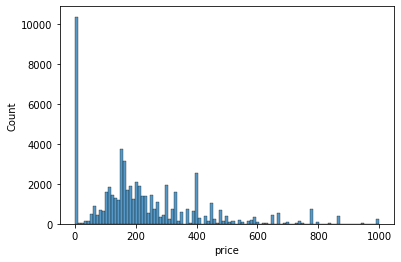

In [710]:
sns.histplot(final_df['price'])

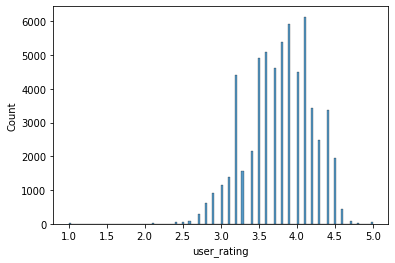

In [711]:
sns.histplot(final_df['user_rating'])

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [712]:
final_df['sentiment'] = np.where((final_df['user_rating'] > 3), 1, np.where((final_df['user_rating']==3), 0,-1))
# 0 - neutral
# 1- positive
# -1 - negative

In [713]:
def assignsentiment(rating):
  if (rating == 3):
    return 0
  elif (rating > 3):
    return 1
  else:
    return -1

final_df['sentiment'] = final_df['user_rating'].apply(lambda x: assignsentiment(x))

In [714]:
#final_df['sentiment'].value_counts().plot(kind='barh')
final_df['sentiment'].value_counts()

 1    57967
-1     2098
 0     1160
Name: sentiment, dtype: int64

### 4.15 Check frequency distribution of the 'sentiment'

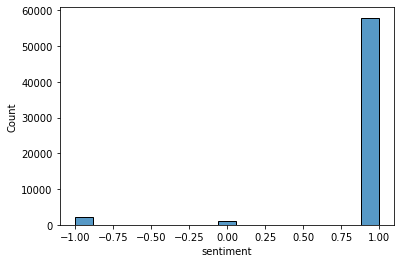

In [715]:
sns.histplot(final_df['sentiment'])
#distribution of the sentiment analysis

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [716]:
pd.crosstab(final_df['sentiment'],final_df['brand']).T.sort_values(by= 'brand', ascending = True)

sentiment,-1,0,1
brand,,,
ASUS,1,0,205
Apple,65,0,4811
Google,283,18,2862
HUAWEI,2,1,2016
Motorola,461,578,6675
Nokia,192,217,4469
OnePlus,0,0,304
Samsung,1094,100,29826
Sony,0,246,2445


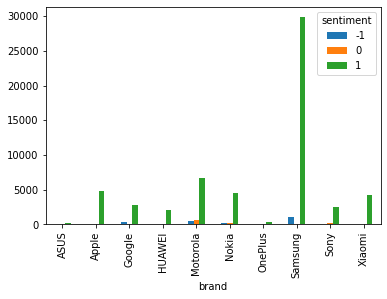

In [717]:
pd.crosstab(final_df['sentiment'],final_df['brand']).T.plot(kind='bar')

In [718]:
# based on the bivaraite analysis, on an average brand price is directly proportional to sentiment of the customer.

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [719]:
final_df.head(5)

,brand,body,price,user_rating,sentiment
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,3.0000000,0
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,3.0000000,0
18,Motorola,The product has been very good. I had used thi...,49.9500000,3.0000000,0
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,2.7000000,-1
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,2.7000000,-1


In [720]:
final_df['body'] = final_df['body'].apply(lambda x: str(x).lower())

In [721]:
print(final_df['body'].dtype)

object


In [722]:
final_df.head(5)

,brand,body,price,user_rating,sentiment
14,Motorola,don't buy out of service,49.9500000,3.0000000,0
17,Motorola,1 star because the phones locked so i have to ...,49.9500000,3.0000000,0
18,Motorola,the product has been very good. i had used thi...,49.9500000,3.0000000,0
21,Motorola,i bought this phone to replace an lg phone tha...,99.9900000,2.7000000,-1
22,Motorola,i purchased this phone for my at&t phone repla...,99.9900000,2.7000000,-1


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [723]:
final_df.head(5)

,brand,body,price,user_rating,sentiment
14,Motorola,don't buy out of service,49.9500000,3.0000000,0
17,Motorola,1 star because the phones locked so i have to ...,49.9500000,3.0000000,0
18,Motorola,the product has been very good. i had used thi...,49.9500000,3.0000000,0
21,Motorola,i bought this phone to replace an lg phone tha...,99.9900000,2.7000000,-1
22,Motorola,i purchased this phone for my at&t phone repla...,99.9900000,2.7000000,-1


In [724]:
import re
def remove_special_characters(text, remove_digits=False):
    #Using regex
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [728]:
final_df['body'] = final_df['body'].replace('[^\w\s]','',regex=True)

In [729]:
final_df['body'] .head(10)

14                              dont buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good i had used this...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my att phone replac...
23    the phone did not come with a charger and didn...
24                    served me well as a back up phone
25    i got this phone just as secondary cell phone ...
26    sturdy  clarity is great  easy to use only pro...
27                                 phone stoped working
Name: body, dtype: object

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [730]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [731]:
from nltk.corpus import stopwords
stop_w = set(stopwords.words('english'))

In [732]:
final_df['body'] = final_df['body'].apply(lambda words: ' '.join(word for word in words.split() if word not in stop_w))

In [733]:
final_df['body'] .head(10)

14                                     dont buy service
17      1 star phones locked pay additional fees unlock
18    product good used cell phone one projects work...
21    bought phone replace lg phone didnt like expec...
22    purchased phone att phone replacement even tho...
23                   phone come charger didnt sims card
24                               served well back phone
25    got phone secondary cell phone really lightwei...
26    sturdy clarity great easy use problem speaker ...
27                                 phone stoped working
Name: body, dtype: object

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [734]:
final_df.shape

(61225, 5)

In [735]:
final_df['body'] .head(10)

14                                     dont buy service
17      1 star phones locked pay additional fees unlock
18    product good used cell phone one projects work...
21    bought phone replace lg phone didnt like expec...
22    purchased phone att phone replacement even tho...
23                   phone come charger didnt sims card
24                               served well back phone
25    got phone secondary cell phone really lightwei...
26    sturdy clarity great easy use problem speaker ...
27                                 phone stoped working
Name: body, dtype: object

In [736]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [737]:
from nltk.stem import WordNetLemmatizer

In [738]:
def lemmatize_text(text):

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  

In [739]:
final_df['body'] = final_df['body'].apply(lambda x:lemmatize_text(str(x)))

In [740]:
final_df['body'] .tail(10)

67953                                              quility
67970    update nov 4 2019 phone crap tmobile customer ...
67971    manufacturer make great phone picking top tier...
67972    coming sony xperia xz premium nice upgrade opi...
67973    beautiful phone gorgeous display fast near sto...
67974    price get good display magnificent backfacing ...
67975    love phone using month black one display graph...
67976                                  best phone sony far
67977                love use battery last 2 day light use
67984            product look work like new much recommend
Name: body, dtype: object

In [741]:
final_df.shape

(61225, 5)

### 5.5 Write a function to check word frequency of the text

In [742]:
from nltk.tokenize import word_tokenize
def FrequsedWords(column):
  a = column.str.cat(sep=' ')
  words = nltk.tokenize.word_tokenize(a)
  word_dist = nltk.FreqDist(words)
  return word_dist

In [743]:
words_used = FrequsedWords(final_df['body'])

In [744]:
len(words_used)

36075

### 5.6 Check word frequency of review having top ratings (sentimet = 1) and display output of few samples

In [745]:
words_used = FrequsedWords(final_df[final_df['sentiment'] ==1]['body'])

In [746]:
print(words_used.most_common(5))

[('phone', 76049), ('great', 16307), ('good', 12814), ('work', 12758), ('battery', 10942)]


### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [747]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [748]:
vect = TfidfVectorizer()
tf_idf_df = vect.fit_transform(final_df['body'])
len(vect.get_feature_names())

36034

In [749]:
tf_idf_df.shape

(61225, 36034)

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [750]:
X = tf_idf_df

In [751]:
y = final_df['sentiment']

### 5.9 Split the data into Train & Test Sets

In [754]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [755]:
X_test.shape

(12245, 36034)

In [756]:
X_train.shape

(48980, 36034)

In [757]:
y_train.shape

(48980,)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [758]:
from sklearn.ensemble import RandomForestClassifier

In [759]:
clf = RandomForestClassifier(random_state = 42)

In [760]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [761]:
y_pred = clf.predict(X_test)

In [762]:
print(clf.score(X_train, y_train))

0.9936096365863618


In [763]:
print(clf.score(X_test, y_test))

0.944467129440588


In [764]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[    5,     1,   447],
       [    1,     2,   212],
       [   10,     9, 11558]])

## 7. Write your conclusion

In [ ]:
# Key observations

# The dataset has imbalance in terms of the product ratings with one brand; Samsung	7469	2030	21521, taking up more than 50% of the user ratings;
# Further sentiment analysis becomes imbalanced with positive sentiment(user_rating> 3) taking up more than 93% of the data, 
# while the negative and neutral ratings combined take up the rest 7%

# The random forest classifier on sentiment analysis of the user rating for various products with a test accuracy of 94.44%. Given the content of the body, 
# the NLP model can predict the sentiment of the user rating. Comparing the Training accuracy of 99.36%, the test accuracy is at 94.44% which is a little bit of underfit, 
# more data will help improve the accuracy
# Also, we can further improve accuracy by hyper parameter tuning